#Cross Validation


Cross-validation is a technique used to evaluate the performance and generalizability of machine learning models. It involves splitting the dataset into multiple subsets (or folds), training the model on a subset of the data, and evaluating it on the remaining subset. This process is repeated multiple times, rotating which subset is used for training and testing, to ensure a robust estimation of the model's performance.


#K-Fold Cross-Validation:

* In K-Fold cross-validation, the dataset is divided into K subsets (or folds) of approximately equal size.
* The model is trained K times, each time using K-1 folds as training data and one fold as validation data.
* The final performance metric is computed as the average of the metric values obtained in each fold.

In [ ]:
import tensorflow as tf
from sklearn.model_selection import KFold
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape((-1, 28*28)).astype('float32') / 255.0
X_test = X_test.reshape((-1, 28*28)).astype('float32') / 255.0

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
for train_index, val_index in kf.split(X_train):
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    model = tf.keras.Sequential([
        tf.keras.layers.Dense(128, activation='relu', input_shape=(784,)),
        tf.keras.layers.Dense(10, activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    model.fit(X_train_fold, y_train_fold, epochs=5, batch_size=32,
              validation_data=(X_val_fold, y_val_fold))

    _, accuracy = model.evaluate(X_val_fold, y_val_fold)
    print(f'Validation Accuracy: {accuracy}')

Epoch 1/5
1500/1500 [==============================] - 10s 6ms/step - loss: 0.2837 - accuracy: 0.9184 - val_loss: 0.1560 - val_accuracy: 0.9552
Epoch 2/5
1500/1500 [==============================] - 9s 6ms/step - loss: 0.1262 - accuracy: 0.9632 - val_loss: 0.1143 - val_accuracy: 0.9659
Epoch 3/5
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0852 - accuracy: 0.9751 - val_loss: 0.0902 - val_accuracy: 0.9726
Epoch 4/5
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0624 - accuracy: 0.9815 - val_loss: 0.0861 - val_accuracy: 0.9739
Epoch 5/5
375/375 [==============================] - 1s 2ms/step - loss: 0.0922 - accuracy: 0.9737
Validation Accuracy: 0.9736666679382324
Epoch 1/5
1500/1500 [==============================] - 9s 6ms/step - loss: 0.2894 - accuracy: 0.9179 - val_loss: 0.1629 - val_accuracy: 0.9526
Epoch 2/5
1500/1500 [==============================] - 8s 6ms/step - loss: 0.1285 - accuracy: 0.9621 - val_loss: 0.1143 - val_accuracy: 0.9655
Ep

#Stratified K-Fold Cross-Validation


Stratified K-Fold cross-validation is particularly useful for classification tasks to ensure that each fold of the dataset maintains the same percentage of samples for each class as the complete dataset. This helps in mitigating issues related to class imbalance during model evaluation.

In [ ]:
import tensorflow as tf
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.datasets import mnist

# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape((-1, 28*28)).astype('float32') / 255.0
X_test = X_test.reshape((-1, 28*28)).astype('float32') / 255.0

# Define Stratified K-Fold cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

fold = 0
for train_index, val_index in skf.split(X_train, y_train):
    fold += 1
    print(f"Training on fold {fold}...")

    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    # Define and compile your TensorFlow model
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(128, activation='relu', input_shape=(784,)),
        tf.keras.layers.Dense(10, activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    # Train the model
    model.fit(X_train_fold, y_train_fold, epochs=5, batch_size=32,
              validation_data=(X_val_fold, y_val_fold))

    # Evaluate the model on the test set
    _, accuracy = model.evaluate(X_test, y_test)
    print(f'Accuracy on test set: {accuracy}\n')

Training on fold 1...
Epoch 1/5
1500/1500 [==============================] - 12s 7ms/step - loss: 0.2812 - accuracy: 0.9194 - val_loss: 0.1676 - val_accuracy: 0.9485
Epoch 2/5
1500/1500 [==============================] - 9s 6ms/step - loss: 0.1283 - accuracy: 0.9621 - val_loss: 0.1184 - val_accuracy: 0.9659
Epoch 3/5
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0870 - accuracy: 0.9736 - val_loss: 0.0999 - val_accuracy: 0.9702
Epoch 4/5
1500/1500 [==============================] - 8s 6ms/step - loss: 0.0634 - accuracy: 0.9802 - val_loss: 0.1018 - val_accuracy: 0.9707
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.0847 - accuracy: 0.9735
Accuracy on test set: 0.9735000133514404

Training on fold 2...
Epoch 1/5
1500/1500 [==============================] - 9s 5ms/step - loss: 0.2906 - accuracy: 0.9182 - val_loss: 0.1687 - val_accuracy: 0.9516
Epoch 2/5
1500/1500 [==============================] - 10s 7ms/step - loss: 0.1304 - accuracy: 0.96

#Leave-One-Out Cross-Validation (LOOCV)


Leave-One-Out Cross-Validation (LOOCV) is a special case of K-Fold cross-validation where K is equal to the number of samples in the dataset. It involves training the model on all but one sample and then testing it on the held-out sample, iterating this process for each sample in the dataset.

In [ ]:
import tensorflow as tf
import numpy as np
from sklearn.model_selection import LeaveOneOut

# Synthetic dataset
X = np.array([[1], [2], [3], [4]], dtype=np.float32)
y = np.array([0, 1, 0, 1], dtype=np.float32)

# Define Leave-One-Out cross-validation
loo = LeaveOneOut()

fold = 0
for train_index, val_index in loo.split(X):
    fold += 1
    print(f"Training on fold {fold}...")

    X_train_fold, X_val_fold = X[train_index], X[val_index]
    y_train_fold, y_val_fold = y[train_index], y[val_index]

    # Define and compile your TensorFlow model
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(1, activation='sigmoid', input_shape=(1,))
    ])

    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # Train the model
    model.fit(X_train_fold, y_train_fold, epochs=50, verbose=0)

    # Evaluate the model on the validation set (single sample)
    _, accuracy = model.evaluate(X_val_fold, y_val_fold)
    print(f'Accuracy on validation set: {accuracy}\n')

Training on fold 1...
1/1 [==============================] - 0s 130ms/step - loss: 0.2116 - accuracy: 1.0000
Accuracy on validation set: 1.0

Training on fold 2...
1/1 [==============================] - 0s 152ms/step - loss: 1.9537 - accuracy: 0.0000e+00
Accuracy on validation set: 0.0

Training on fold 3...
1/1 [==============================] - 0s 133ms/step - loss: 0.7363 - accuracy: 0.0000e+00
Accuracy on validation set: 0.0

Training on fold 4...


1/1 [==============================] - 0s 144ms/step - loss: 0.0107 - accuracy: 1.0000
Accuracy on validation set: 1.0



# VC Dimension
# Definition:
VC (Vapnik-Chervonenkis) dimension is a measure of the capacity or complexity of a hypothesis set in machine learning. It represents the maximum number of points that a hypothesis set can shatter (separate into positive and negative classes) under all possible configurations of these points.

# Understanding VC Dimension:
The VC dimension provides insights into the learning capacity of a model or a family of models. A higher VC dimension generally implies a more complex model that can fit a wider range of training data patterns but may also increase the risk of overfitting.

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

In [ ]:
# Load and preprocess MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize pixel values to be between 0 and 1
X_train, X_test = X_train / 255.0, X_test / 255.0

# Reshape images to flatten them into a 1D array (784 features)
X_train = X_train.reshape((X_train.shape[0], -1))
X_test = X_test.reshape((X_test.shape[0], -1))

# Convert labels to categorical format (one-hot encoding)
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [ ]:
# Define the MLP model
model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Display model architecture
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 128)               100480    
                                                                 
 dense_27 (Dense)            (None, 64)                8256      
                                                                 
 dense_28 (Dense)            (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109386 (427.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

Epoch 1/10
1685/1688 [============================>.] - ETA: 0s - loss: 0.2524 - accuracy: 0.9250

1688/1688 [==============================] - 10s 6ms/step - loss: 0.2525 - accuracy: 0.9250 - val_loss: 0.1085 - val_accuracy: 0.9683
Epoch 2/10
1688/1688 [==============================] - 10s 6ms/step - loss: 0.1071 - accuracy: 0.9679 - val_loss: 0.1023 - val_accuracy: 0.9687
Epoch 3/10
1688/1688 [==============================] - 10s 6ms/step - loss: 0.0752 - accuracy: 0.9772 - val_loss: 0.0981 - val_accuracy: 0.9737
Epoch 4/10
1688/1688 [==============================] - 8s 5ms/step - loss: 0.0567 - accuracy: 0.9815 - val_loss: 0.0880 - val_accuracy: 0.9758
Epoch 5/10
1688/1688 [==============================] - 9s 6ms/step - loss: 0.0445 - accuracy: 0.9855 - val_loss: 0.0780 - val_accuracy: 0.9798
Epoch 6/10
1688/1688 [==============================] - 10s 6ms/step - loss: 0.0363 - accuracy: 0.9883 - val_loss: 0.0951 - val_accuracy: 0.9737
Epoch 7/10
1688/1688 [==============================] - 9s 5ms/step - loss: 0.0293 - accuracy: 0.9906 - val_loss: 0.0771 - val_accuracy: 0.9802

In [ ]:
import matplotlib.pyplot as plt

# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#VC Dimension of MLPs: Key Considerations
#Model Complexity and Representation:

* MLPs are capable of representing complex, non-linear decision boundaries due to their layered architecture and activation functions.
* The VC dimension of an MLP depends on factors such as the number of neurons per layer, number of layers, and the choice of activation functions.

#Combinatorial Complexity:

* Calculating the exact VC dimension for MLPs is challenging due to the high-dimensional input space and the non-linear nature of neural network decision boundaries.
* The VC dimension increases with the network's capacity to fit diverse patterns in the data, determined by the interplay of network architecture and parameter space.

# Network Architecture:

* Increasing the number of neurons per layer or adding more layers generally increases the VC dimension, as the network gains more flexibility to represent complex functions.
* Deeper networks can capture hierarchical features but may also lead to higher VC dimension and increased risk of overfitting.

# Estimating VC Dimension
Estimating the VC dimension of MLPs involves theoretical analysis and empirical validation:

* Theoretical Bounds: The VC dimension can be bounded based on the number of parameters (weights and biases) in the network and the expressive power of the activation functions.
* Empirical Analysis: Conducting experiments with synthetic datasets to test the shattering capabilities of MLPs under different configurations of input points and labels.

#Perceptron


A perceptron is the simplest form of a neural network, typically used for binary classification tasks. It consists of a single layer of input nodes (each representing an input feature), followed by a set of weights and a bias. The perceptron calculates a weighted sum of its inputs and applies an activation function (e.g., step function) to produce a binary output.


In [ ]:
import tensorflow as tf
import numpy as np

# Synthetic dataset
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=np.float32)
y = np.array([0, 0, 0, 1], dtype=np.float32)

# Define perceptron model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation='sigmoid', input_shape=(2,))
])

model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

# Train the perceptron
model.fit(X, y, epochs=100, verbose=1)

# Test the perceptron
predictions = model.predict(X)
print(predictions)

Epoch 1/100
1/1 [==============================] - 1s 513ms/step - loss: 0.7030 - accuracy: 0.5000
Epoch 2/100
1/1 [==============================] - 0s 18ms/step - loss: 0.7025 - accuracy: 0.5000
Epoch 3/100
1/1 [==============================] - 0s 18ms/step - loss: 0.7020 - accuracy: 0.5000
Epoch 4/100
1/1 [==============================] - 0s 21ms/step - loss: 0.7015 - accuracy: 0.5000
Epoch 5/100
1/1 [==============================] - 0s 20ms/step - loss: 0.7010 - accuracy: 0.5000
Epoch 6/100
1/1 [==============================] - 0s 15ms/step - loss: 0.7005 - accuracy: 0.5000
Epoch 7/100
1/1 [==============================] - 0s 17ms/step - loss: 0.7000 - accuracy: 0.5000
Epoch 8/100
1/1 [==============================] - 0s 16ms/step - loss: 0.6994 - accuracy: 0.5000
Epoch 9/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6989 - accuracy: 0.5000
Epoch 10/100
1/1 [==============================] - 0s 15ms/step - loss: 0.6984 - accuracy: 0.5000
Epoch 11/100
1/1 [

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
# Load the IRIS dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Create and train the Perceptron classifier
perceptron = Perceptron(random_state=42)
perceptron.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_perceptron = perceptron.predict(X_test_scaled)

# Evaluate accuracy
accuracy_perceptron = accuracy_score(y_test, y_pred_perceptron)
print("Perceptron Accuracy:", accuracy_perceptron)

# Confusion matrix
cm_perceptron = confusion_matrix(y_test, y_pred_perceptron)
print("Perceptron Confusion Matrix:")
print(cm_perceptron)

Perceptron Accuracy: 0.9333333333333333
Perceptron Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  2  9]]


In [ ]:
# Create and train the Logistic Regression classifier
logistic_regression = LogisticRegression(random_state=42, max_iter=200)
logistic_regression.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_logistic = logistic_regression.predict(X_test_scaled)

# Evaluate accuracy
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print("Logistic Regression Accuracy:", accuracy_logistic)

# Confusion matrix
cm_logistic = confusion_matrix(y_test, y_pred_logistic)
print("Logistic Regression Confusion Matrix:")
print(cm_logistic)

Logistic Regression Accuracy: 1.0
Logistic Regression Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


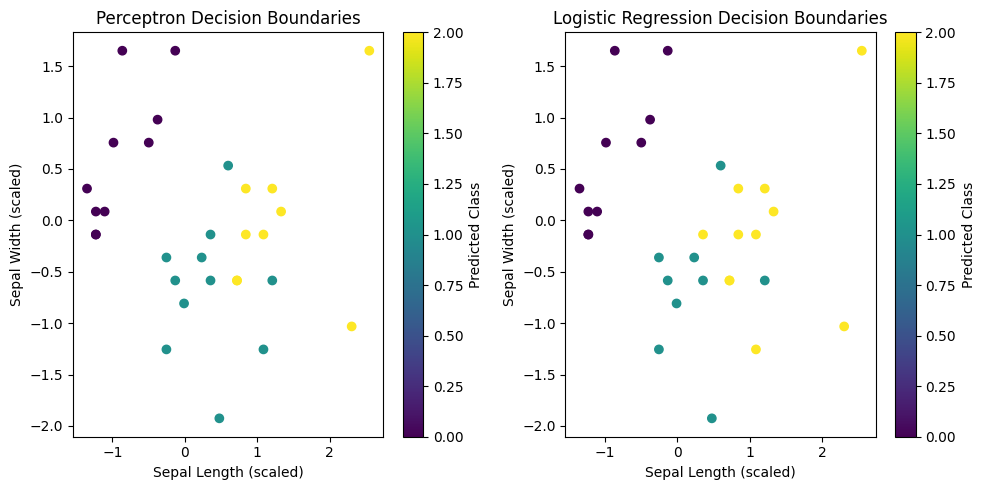

In [ ]:
# Plot decision boundaries for Perceptron
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Perceptron Decision Boundaries")
plt.xlabel("Sepal Length (scaled)")
plt.ylabel("Sepal Width (scaled)")
plt.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], c=y_pred_perceptron, cmap='viridis')
plt.colorbar(label='Predicted Class')

# Plot decision boundaries for Logistic Regression
plt.subplot(1, 2, 2)
plt.title("Logistic Regression Decision Boundaries")
plt.xlabel("Sepal Length (scaled)")
plt.ylabel("Sepal Width (scaled)")
plt.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], c=y_pred_logistic, cmap='viridis')
plt.colorbar(label='Predicted Class')

plt.tight_layout()
plt.show()


#Let's simulate the Logistic Classifier approach to the Perceptron

In [ ]:
from sklearn.linear_model import Perceptron
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix

# Load the IRIS dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the Perceptron with modified hyperparameters
perceptron = Perceptron(max_iter=100, eta0=0.1, random_state=42)  # Increase max_iter and adjust eta0
perceptron.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_perceptron = perceptron.predict(X_test_scaled)

# Evaluate accuracy
accuracy_perceptron = accuracy_score(y_test, y_pred_perceptron)
print("Perceptron Accuracy:", accuracy_perceptron)

# Confusion matrix
cm_perceptron = confusion_matrix(y_test, y_pred_perceptron)
print("Perceptron Confusion Matrix:")
print(cm_perceptron)

Perceptron Accuracy: 0.9333333333333333
Perceptron Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  2  9]]


In [ ]:
import tensorflow as tf
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix

# Load the IRIS dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the Perceptron-like logistic classifier using TensorFlow
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation='sigmoid', input_shape=(X_train_scaled.shape[1],))
])

# Compile the model
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

# Display the model architecture
model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_31 (Dense)            (None, 1)                 5         
                                                                 
Total params: 5 (20.00 Byte)
Trainable params: 5 (20.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Train the model
model.fit(X_train_scaled, y_train, epochs=50, verbose=1)

# Evaluate the model on the test set
y_pred_proba = model.predict(X_test_scaled)  # Predict probabilities
y_pred = (y_pred_proba > 0.5).astype(int).flatten()  # Convert probabilities to binary predictions

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Epoch 1/50
4/4 [==============================] - 1s 8ms/step - loss: -0.2885 - accuracy: 0.5000
Epoch 2/50
4/4 [==============================] - 0s 7ms/step - loss: -0.3247 - accuracy: 0.5083
Epoch 3/50
4/4 [==============================] - 0s 6ms/step - loss: -0.3606 - accuracy: 0.5167
Epoch 4/50
4/4 [==============================] - 0s 7ms/step - loss: -0.3960 - accuracy: 0.5167
Epoch 5/50
4/4 [==============================] - 0s 7ms/step - loss: -0.4301 - accuracy: 0.5250
Epoch 6/50
4/4 [==============================] - 0s 8ms/step - loss: -0.4642 - accuracy: 0.5250
Epoch 7/50
4/4 [==============================] - 0s 7ms/step - loss: -0.4970 - accuracy: 0.5250
Epoch 8/50
4/4 [==============================] - 0s 9ms/step - loss: -0.5294 - accuracy: 0.5250
Epoch 9/50
4/4 [==============================] - 0s 10ms/step - loss: -0.5615 - accuracy: 0.5250
Epoch 10/50
4/4 [==============================] - 0s 7ms/step - loss: -0.5937 - accuracy: 0.5250
Epoch 11/50
4/4 [===========